In [1]:
import pandas as pd

In [45]:
data=pd.read_csv('day.csv')
data.head(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
data['dteday']=pd.to_datetime(data['dteday'])

In [7]:
data['day']=data['dteday'].dt.day

In [12]:
data=data.drop(['instant'],axis=1)

In [13]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [15]:
import matplotlib.pyplot as plt
import seaborn as sn

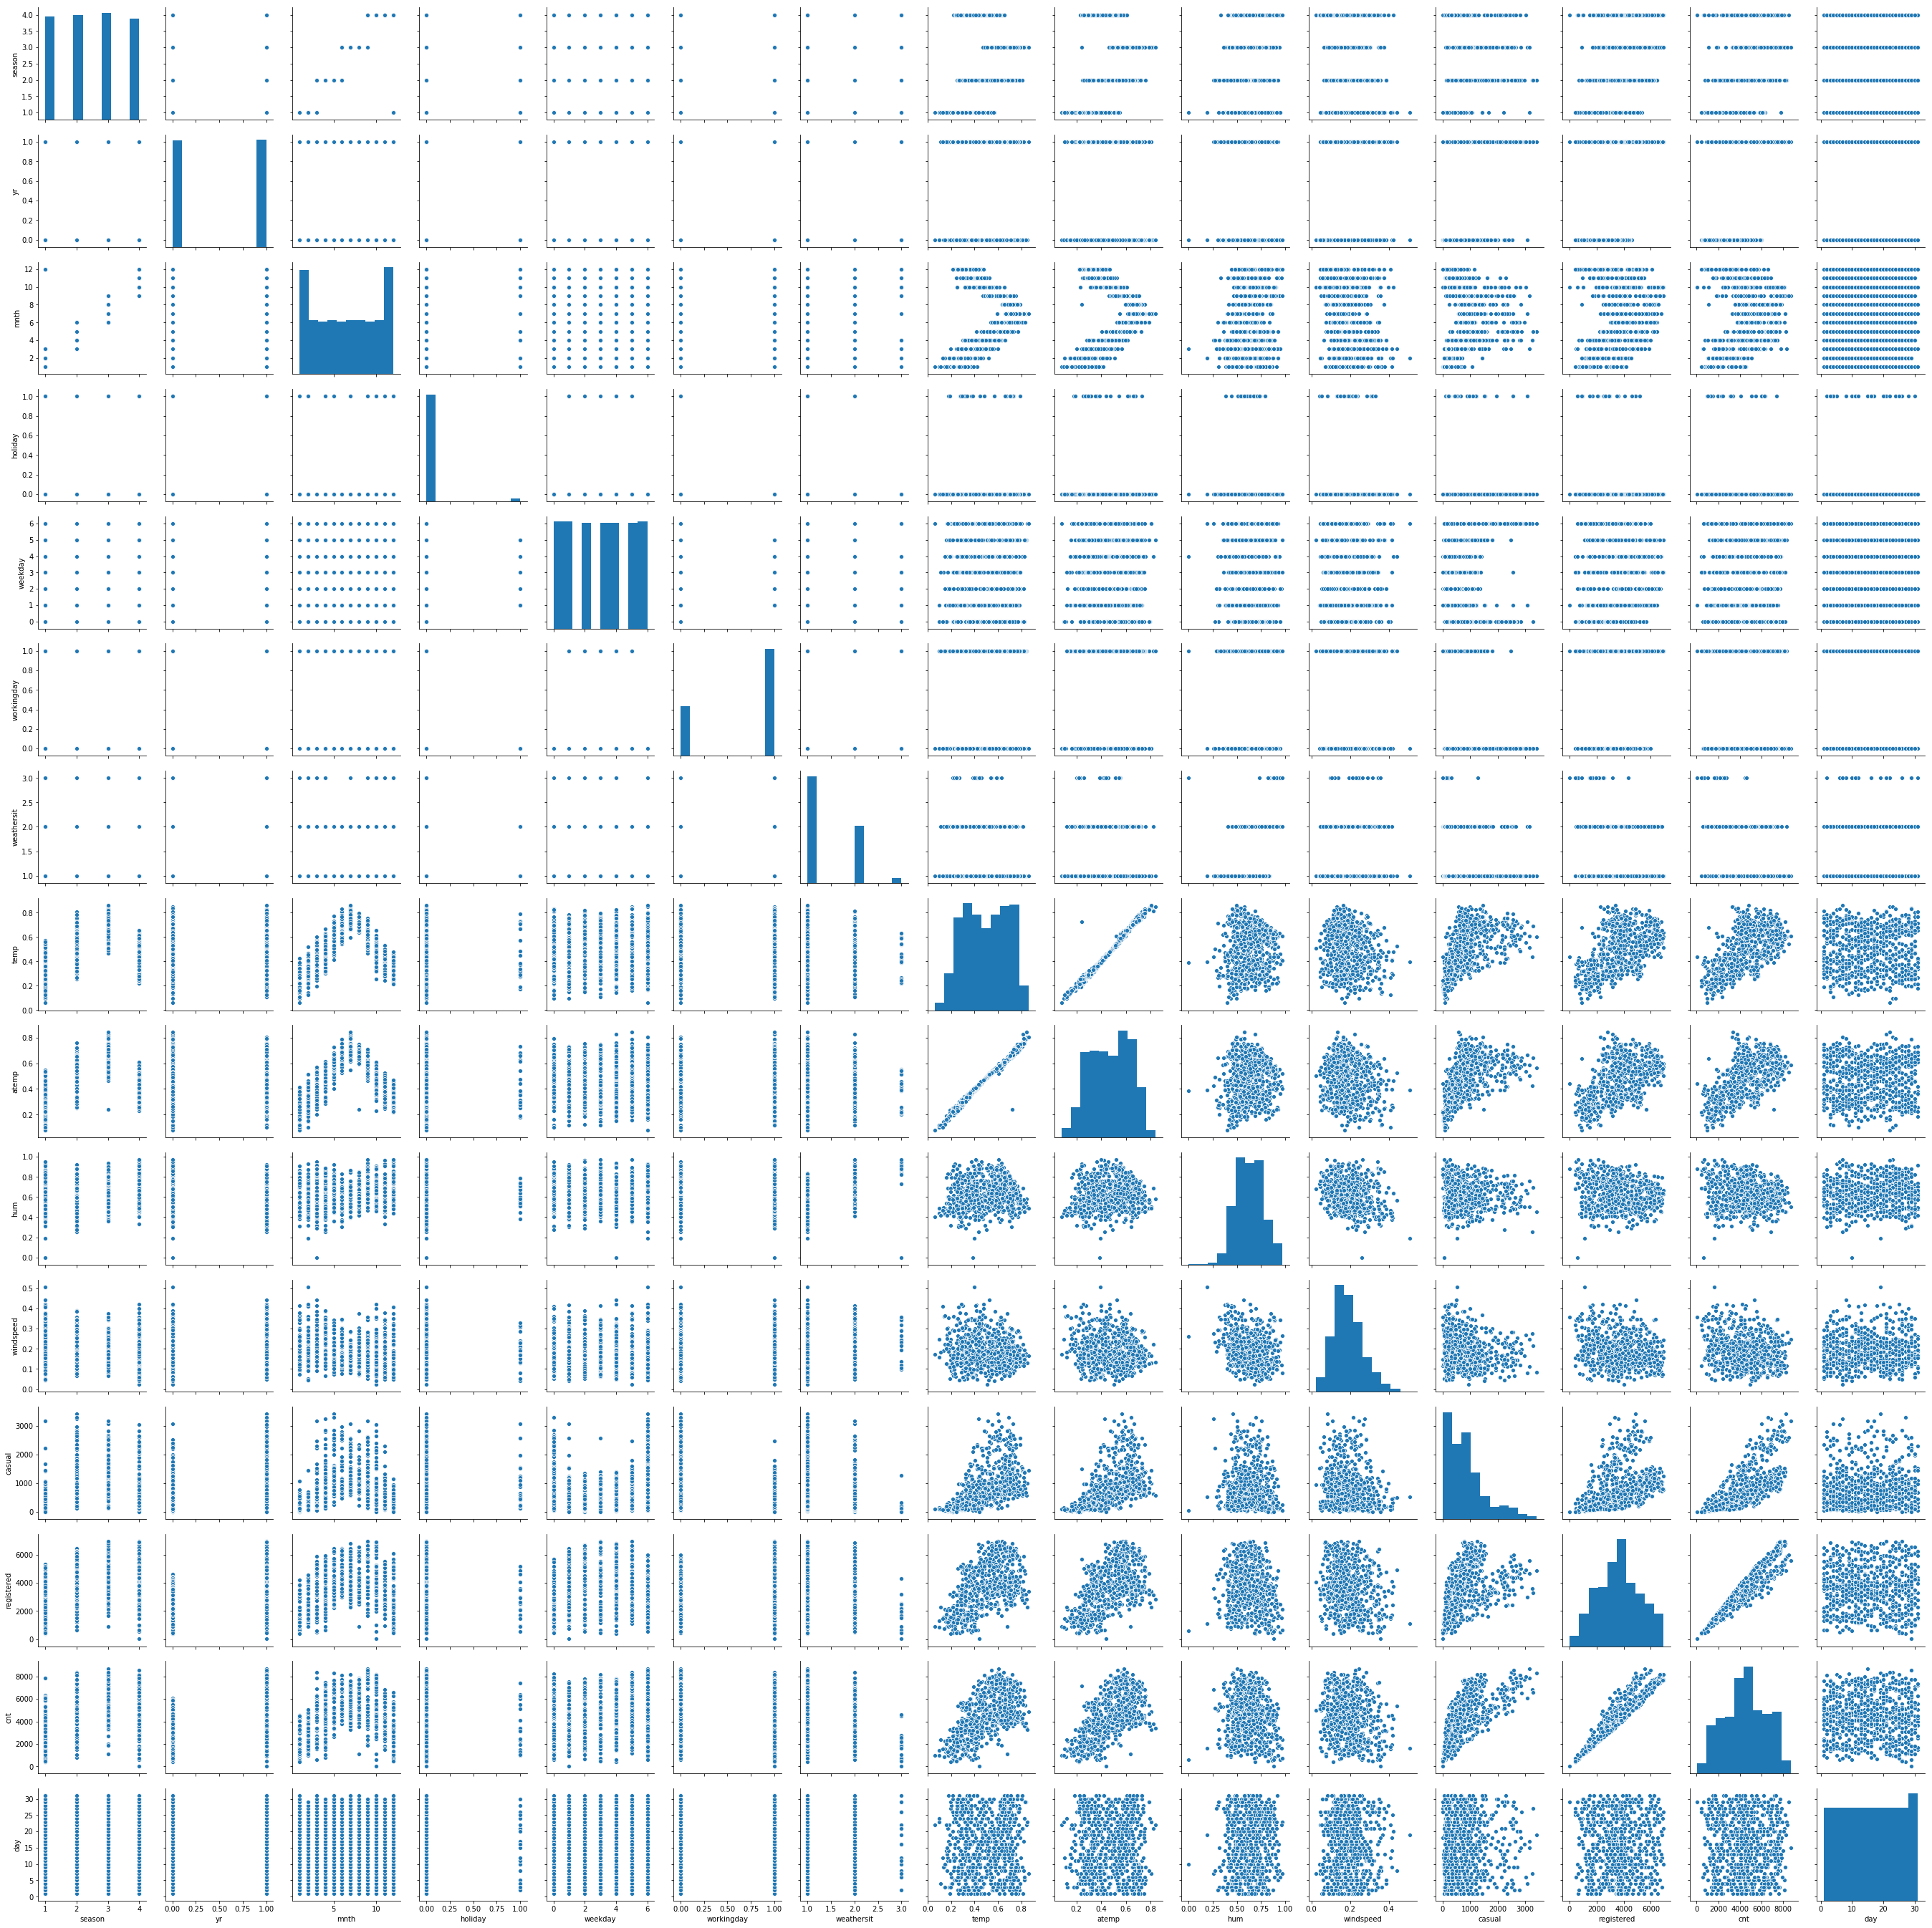

In [16]:
sn.pairplot(data)

In [18]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.738714
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.809949
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,8.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000


In [19]:
import statsmodels.api as sm

In [20]:
X=data.drop(['cnt'],axis=1)
y=data['cnt']

In [22]:
x=sm.add_constant(X)

In [23]:
model=sm.OLS(y,x)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.967e+31
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:40:44   Log-Likelihood:                 18791.
No. Observations:                 731   AIC:                        -3.755e+04
Df Residuals:                     716   BIC:                        -3.748e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.785e-12   4.87e-13     -5.721      0.000   -3.74e-12   -1.83e-12
season     -4.761e-13   1.13e-13     -4.208      0.000   -6.98e-13   -2.54e-13
yr         -2.665e-12   2.06e-13    -12.945      0.000   -3.07e-12   -2.26e-12
mnth        2.558e-13   3.29e-14      7.765      0.000    1.91e-13     3.2e-13
holiday     1.208e-13   3.89e-13      0.311      0.756   -6.43e-13    8.84e-13
weekday      4.53e-14   3.17e-14      1.428      0.154    -1.7e-14    1.08e-13
workingday -7.461e-14   2.35e-13     -0.317      0.751   -5.37e-13    3.87e-13
weathersit  4.086e-14   1.58e-13      0.258      0.796    -2.7e-13    3.51e-13
temp        1.194e-12   2.71e-12      0.441      0.659   -4.12e-12    6.51e-12
atemp       5.684e-14   3.07e-12      0.019      0.985   -5.96e-12    6.08e-12
hum         8.527e-14    6.1e-13      0.140      0.889   -1.11e-12    1.28e-12
windspeed   1.521e-12   8.96e-13      1.697      0.090   -2.38e-13    3.28e-12
casual         1.0000    1.7e-16   5.89e+15      0.000       1.000       1.000
registered     1.0000   9.76e-17   1.02e+16      0.000       1.000       1.000
day         3.242e-14    7.1e-15      4.563      0.000    1.85e-14    4.64e-14
==============================================================================
Omnibus:                       19.291   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.407
Skew:                           0.178   Prob(JB):                      0.00202
Kurtosis:                       2.471   Cond. No.                     2.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df=X.drop(['holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed'],axis=1)
df.head()

,season,yr,mnth,casual,registered,day
0,1,0,1,331,654,1
1,1,0,1,131,670,2
2,1,0,1,120,1229,3
3,1,0,1,108,1454,4
4,1,0,1,82,1518,5


In [25]:
x2=sm.add_constant(df)

C:\Users\Raj\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
model2=sm.OLS(y,x2)
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.619e+31
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:45:27   Log-Likelihood:                 18595.
No. Observations:                 731   AIC:                        -3.718e+04
Df Residuals:                     724   BIC:                        -3.714e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.348e-12   2.79e-13     -4.841      0.000    -1.9e-12   -8.01e-13
season     -1.421e-12   1.43e-13     -9.905      0.000    -1.7e-12   -1.14e-12
yr         -2.942e-12   2.14e-13    -13.760      0.000   -3.36e-12   -2.52e-12
mnth        5.222e-13   4.25e-14     12.290      0.000    4.39e-13    6.06e-13
casual         1.0000   1.28e-16   7.78e+15      0.000       1.000       1.000
registered     1.0000   7.77e-17   1.29e+16      0.000       1.000       1.000
day         5.951e-14   9.16e-15      6.497      0.000    4.15e-14    7.75e-14
==============================================================================
Omnibus:                       90.109   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.239
Skew:                          -0.768   Prob(JB):                     5.89e-36
Kurtosis:                       4.722   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

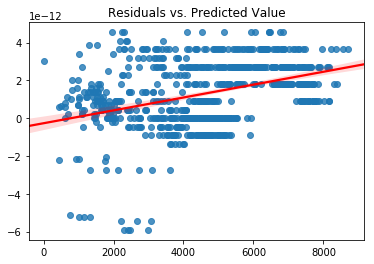

In [27]:
fitted_vals = model2.predict()
resids = model2.resid

sn.regplot(x=fitted_vals, y=resids,line_kws={'color':'red'})
plt.title('Residuals vs. Predicted Value')

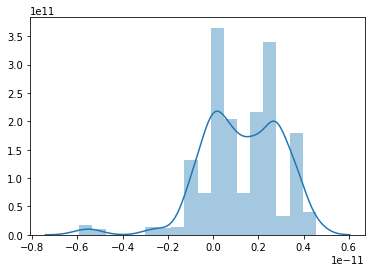

In [29]:
sn.distplot(model2.resid)

((array([-3.10612952, -2.83371839, -2.68121219, -2.57340905, -2.48915191,
         -2.41955673, -2.36001798, -2.30782877, -2.26125818, -2.21912992,
         -2.18060696, -2.14507173, -2.11205508, -2.08119197, -2.05219258,
         -2.0248228 , -1.99889075, -1.97423711, -1.95072808, -1.92825019,
         -1.90670633, -1.88601273, -1.8660966 , -1.84689427, -1.82834975,
         -1.81041348, -1.79304141, -1.77619419, -1.75983653, -1.74393663,
         -1.72846577, -1.71339788, -1.69870925, -1.68437825, -1.67038506,
         -1.6567115 , -1.64334086, -1.63025771, -1.6174478 , -1.60489794,
         -1.59259587, -1.58053022, -1.56869036, -1.55706641, -1.54564912,
         -1.53442983, -1.52340042, -1.51255328, -1.50188124, -1.49137757,
         -1.4810359 , -1.47085025, -1.46081495, -1.45092464, -1.44117426,
         -1.431559  , -1.4220743 , -1.41271583, -1.40347947, -1.39436132,
         -1.38535765, -1.3764649 , -1.36767969, -1.35899879, -1.35041911,
         -1.3419377 , -1.33355173, -1.

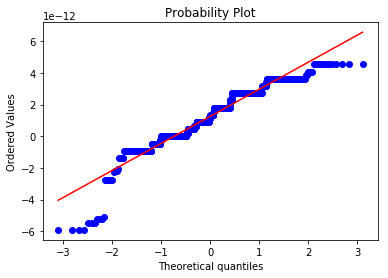

In [32]:
from scipy import stats
stats.probplot(model2.resid, plot=sn.mpl.pyplot)

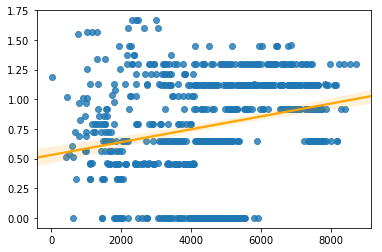

In [34]:
import numpy as np
resids_standardized = model2.get_influence().resid_studentized_internal
sn.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)),line_kws={'color':'orange'})

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif1= [variance_inflation_factor(x.values, i) for i in range(x2.shape[1])]
pd.DataFrame(vif1[1:],index=x2.columns[1:])

,0
season,4.105079
yr,2.756825
mnth,3.360556
casual,1.098406
registered,1.051474
day,3.114792


In [64]:
a=x2.iloc[0:5]
a

,const,season,yr,mnth,casual,registered,day
0,1.0,1,0,1,331,654,1
1,1.0,1,0,1,131,670,2
2,1.0,1,0,1,120,1229,3
3,1.0,1,0,1,108,1454,4
4,1.0,1,0,1,82,1518,5


In [65]:
model2.predict(a)

0     985.0
1     801.0
2    1349.0
3    1562.0
4    1600.0
dtype: float64

In [66]:
data['cnt'].head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [67]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [71]:
a=data.drop(['instant','dteday','cnt'],1)
a.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518


In [72]:
o=data['cnt']
o.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(a,o,test_size=0.3,random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lm=LinearRegression()

In [78]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [79]:
lm.score(xtrain,ytrain)

1.0

In [80]:
lm.score(xtest,ytest)

1.0

In [82]:
y_pred=lm.predict(xtest)

In [84]:
pd.DataFrame({'actual':ytest,'predicted':y_pred})

,actual,predicted
703,6606,6606.0
33,1550,1550.0
300,3747,3747.0
456,6041,6041.0
633,7538,7538.0
557,7264,7264.0
39,1605,1605.0
356,2209,2209.0
559,7499,7499.0
514,5743,5743.0
